In [126]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [127]:
# Load the data from a CSV file
df = pd.read_csv("../data/all_v2_data.csv", sep=",")

In [128]:
df.dropna(inplace=True)


In [129]:
df.columns

Index(['Mnd', 'Ap', 'Hoyre', 'Frp', 'SV', 'SP', 'KrF', 'Venstre', 'MDG',
       'Rodt', 'Andre', 'Ap_var', 'Hoyre_var', 'Frp_var', 'SV_var', 'SP_var',
       'KrF_var', 'Venstre_var', 'MDG_var', 'Rodt_var', 'Andre_var',
       'Ap_skandale', 'Hoyre_skandale', 'Frp_skandale', 'SV_skandale',
       'SP_skandale', 'KrF_skandale', 'Venstre_skandale', 'MDG_skandale',
       'Rodt_skandale', 'Andre_skandale', 'Ap_skandale_lag3',
       'Ap_skandale_lag6', 'Hoyre_skandale_lag3', 'Hoyre_skandale_lag6',
       'Frp_skandale_lag3', 'Frp_skandale_lag6', 'SV_skandale_lag3',
       'SV_skandale_lag6', 'SP_skandale_lag3', 'SP_skandale_lag6',
       'KrF_skandale_lag3', 'KrF_skandale_lag6', 'Venstre_skandale_lag3',
       'Venstre_skandale_lag6', 'MDG_skandale_lag3', 'MDG_skandale_lag6',
       'Rodt_skandale_lag3', 'Rodt_skandale_lag6', 'Andre_skandale_lag3',
       'Andre_skandale_lag6', 'Ap_reg', 'Hoyre_reg', 'Frp_reg', 'SV_reg',
       'Sp_reg', 'KrF_reg', 'Venstre_reg', 'MDG_reg', 'Rodt_reg', 'A

In [130]:
parties=['Ap', 'Hoyre', 'Frp', 'SV', 'SP', 'KrF', 'Venstre', 'MDG','Rodt', 'Andre']

In [131]:
for party in parties:
    y=df[[party]]
    X=df[[f'{party}_var', f'{party}_skandale',f'{party}_skandale_lag3', f'{party}_skandale_lag6', 
          f'{party}_reg, f'party}_reg_lag3, 
       'ledighet', 'ledig_trend3', 'ledig_trend6', 'styringsrente',
       'styringsrente_trend3', 'styringsrente_trend6']]

In [132]:


# 1. Split data
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=42
)

# 2. Build pipeline
pipeline = Pipeline([
    ("feature_selection", SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42), threshold="median")),
    ("regressor", RandomForestRegressor(n_estimators=1000, random_state=42))
])

# 3. Train pipeline
pipeline.fit(x_train, y_train.values.ravel())

# 4. Predict
y_pred = pipeline.predict(x_test)

# 5. Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test RMSE: {rmse:.3f}")
print(f"Test R² Score: {r2:.3f}")


Test MSE: 0.047
Test RMSE: 0.218
Test R² Score: 0.984


C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


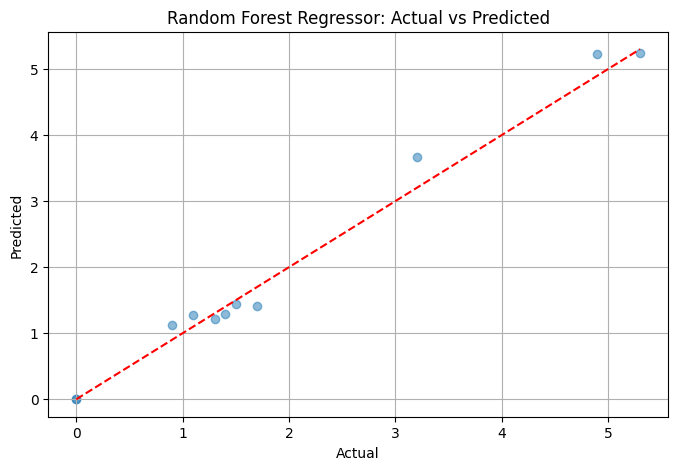

In [133]:

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest Regressor: Actual vs Predicted")
plt.grid(True)
plt.show()

In [134]:
# Access the trained selector and regressor from the pipeline
selector = pipeline.named_steps["feature_selection"]
regressor = pipeline.named_steps["regressor"]

# Get boolean mask of selected features
selected_mask = selector.get_support()
selected_features = x_train.columns[selected_mask]

# Get feature importances from the trained regressor
importances = regressor.feature_importances_

# Create DataFrame with selected feature importances
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                Feature  Importance
0             Andre_var    0.965749
4  styringsrente_trend6    0.012910
2          ledig_trend6    0.007792
3         styringsrente    0.006966
1              ledighet    0.006583


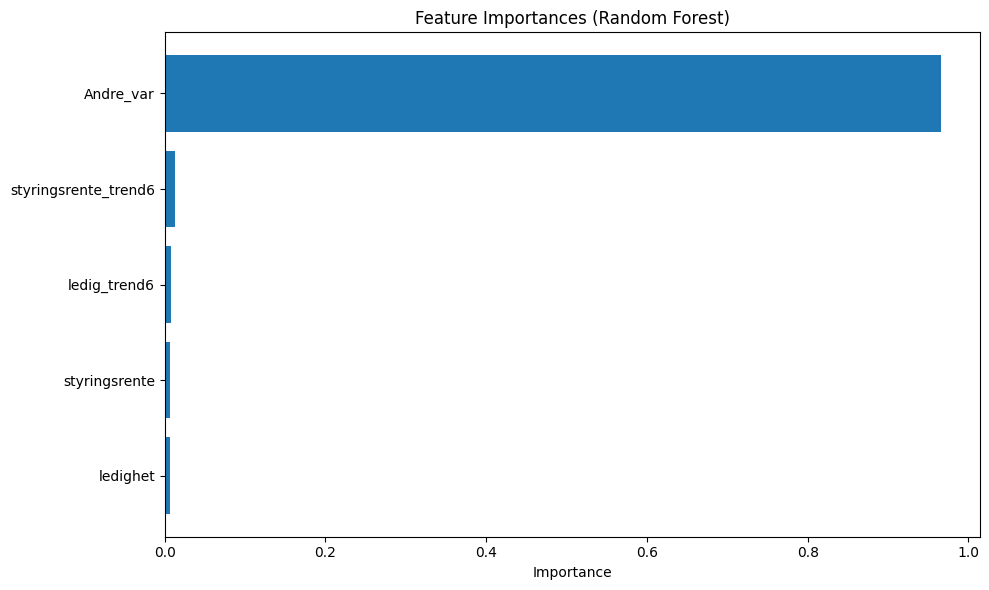

In [135]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()  # Most important on top
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()